# Using pytorch with 3+ channel images

In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import skimage
from skimage import io
%matplotlib inline

print(sys.version_info)

sys.version_info(major=3, minor=6, micro=4, releaselevel='final', serial=0)


In [2]:
image_dir = "/mnt/ImageXpress/2015-12-12 val screen/val screen/SW-MDA-231/2015-12-13/4695/"

# get images from a single site, excluding thumbnails
all_images = os.listdir(image_dir)

images = [i for i in all_images if "A01_s1" in i and "thumb" not in i]
img_paths = [os.path.join(image_dir, img) for img in images]
img_paths = sorted(img_paths)
for i in img_paths:
    print(i)

/mnt/ImageXpress/2015-12-12 val screen/val screen/SW-MDA-231/2015-12-13/4695/val screen_A01_s1_w195D6D10C-C9B1-41D8-9D3B-E2FD867BD799.tif
/mnt/ImageXpress/2015-12-12 val screen/val screen/SW-MDA-231/2015-12-13/4695/val screen_A01_s1_w23FF54F55-8DCF-4800-AF61-37786B19766C.tif
/mnt/ImageXpress/2015-12-12 val screen/val screen/SW-MDA-231/2015-12-13/4695/val screen_A01_s1_w373C5DBE1-5CD2-44E4-89DB-7D5B5EB02154.tif
/mnt/ImageXpress/2015-12-12 val screen/val screen/SW-MDA-231/2015-12-13/4695/val screen_A01_s1_w48E44EF77-1BBB-465A-9285-37C04307C570.tif
/mnt/ImageXpress/2015-12-12 val screen/val screen/SW-MDA-231/2015-12-13/4695/val screen_A01_s1_w57F6A625E-CCA5-4415-B190-C111814660DF.tif


In [3]:
imgs = [skimage.img_as_float(i) for i in io.imread_collection(img_paths)]

img_stack = np.stack(imgs)

def crop_center(img, crop_x, crop_y):
    channel, y, x = img.shape
    start_x = x // 2 - (crop_x // 2)
    start_y = y // 2 - (crop_y // 2)    
    return img[:, start_y:start_y+crop_y, start_x:start_x+crop_x]

img_stack_cropped = crop_center(img_stack, 300, 300)

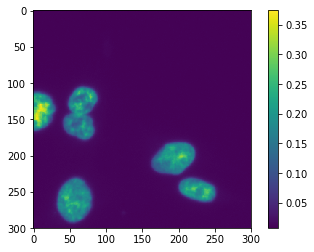

In [4]:
plt.imshow(img_stack_cropped[0])
plt.colorbar()
plt.show()

In [5]:
from torch.autograd import Variable
from torch import Tensor

img_tensor = Tensor(img_stack_cropped)

In [6]:
img_tensor


( 0 ,.,.) = 
  0.0101  0.0099  0.0093  ...   0.0094  0.0104  0.0101
  0.0104  0.0093  0.0095  ...   0.0092  0.0094  0.0097
  0.0100  0.0096  0.0097  ...   0.0098  0.0102  0.0096
           ...             ⋱             ...          
  0.0139  0.0134  0.0123  ...   0.0111  0.0113  0.0117
  0.0131  0.0120  0.0120  ...   0.0106  0.0111  0.0111
  0.0124  0.0113  0.0130  ...   0.0121  0.0119  0.0107

( 1 ,.,.) = 
  0.0188  0.0187  0.0196  ...   0.0198  0.0181  0.0192
  0.0189  0.0192  0.0195  ...   0.0186  0.0196  0.0182
  0.0178  0.0191  0.0174  ...   0.0180  0.0192  0.0179
           ...             ⋱             ...          
  0.0513  0.0524  0.0553  ...   0.0237  0.0250  0.0253
  0.0522  0.0550  0.0537  ...   0.0269  0.0272  0.0269
  0.0542  0.0538  0.0525  ...   0.0273  0.0300  0.0298

( 2 ,.,.) = 
  0.0201  0.0187  0.0196  ...   0.0197  0.0196  0.0190
  0.0192  0.0199  0.0194  ...   0.0194  0.0195  0.0188
  0.0200  0.0193  0.0186  ...   0.0180  0.0192  0.0188
           ...         

## Creating a pytorch CNN which works with 5 channels

In [8]:
import torch
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.nn import init


-


In [11]:
x = Net()

# as we don't have a batch dimension on the single image
img_test = img_tensor.unsqueeze(0)

out = x(Variable(img_test))

out

Variable containing:
 0.0188  0.0557  0.0176  0.0500  0.1454 -0.0305  0.0021 -0.0480
[torch.FloatTensor of size 1x8]

Variable containing:
-0.0376  0.0864 -0.1182 -0.0458  0.0817 -0.0342 -0.0825  0.0603
[torch.FloatTensor of size 1x8]